#imports and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

G0 = X_train[train_labels==0,:]
G1 = X_train[train_labels==1,:]
G2 = X_train[train_labels==2,:]
G3 = X_train[train_labels==3,:]
G4 = X_train[train_labels==4,:]
G5 = X_train[train_labels==5,:]
G6 = X_train[train_labels==6,:]
G7 = X_train[train_labels==7,:]
G8 = X_train[train_labels==8,:]
G9 = X_train[train_labels==9,:]

#NCL2

In [ ]:
#let k=1
#find dist from k to all train points
#find clostsest 1 from each group
#find centroid
#find dist from k to each centroid
#find smallest distance
#arg min to find prediction

#k=2 
#find next closest
#find centroid
#find dist from test point to each centroid
#find smallest distance
#arg min to find prediction
#... repeat for k 3:12

#
k1_preds=[]
k2_preds=[]
k3_preds=[]
k4_preds=[]
k5_preds=[]
k6_preds=[]
k7_preds=[]
k8_preds=[]
k9_preds=[]
k10_preds=[]
k11_preds=[]
k12_preds=[]

for r in range(X_test.shape[0]): #later replace with X_test.shape[0]

    G0_dists, G1_dists, G2_dists, G3_dists, G4_dists = [],[],[],[],[] 
    G5_dists, G6_dists, G7_dists, G8_dists, G9_dists = [],[],[],[],[]
    closest_img_index_G0, closest_img_index_G1, closest_img_index_G2 = [],[],[]
    closest_img_index_G3, closest_img_index_G4, closest_img_index_G5= [],[],[]
    closest_img_index_G6, closest_img_index_G7, closest_img_index_G8  = [],[],[]
    closest_img_index_G9 = []

    test_point = X_test[r,:]

    #finds all distances, only run once
    for i in range(G0.shape[0]):
        G0_dists.append( np.sqrt(np.sum((  test_point - G0[i,:]  )**2)) )
        G1_dists.append( np.sqrt(np.sum((  test_point - G1[i,:]  )**2)) )
        G2_dists.append( np.sqrt(np.sum((  test_point - G2[i,:]  )**2)) )
        G3_dists.append( np.sqrt(np.sum((  test_point - G3[i,:]  )**2)) )
        G4_dists.append( np.sqrt(np.sum((  test_point - G4[i,:]  )**2)) )
        G5_dists.append( np.sqrt(np.sum((  test_point - G5[i,:]  )**2)) )
        G6_dists.append( np.sqrt(np.sum((  test_point - G6[i,:]  )**2)) )
        G7_dists.append( np.sqrt(np.sum((  test_point - G7[i,:]  )**2)) )
        G8_dists.append( np.sqrt(np.sum((  test_point - G8[i,:]  )**2)) )
        G9_dists.append( np.sqrt(np.sum((  test_point - G9[i,:]  )**2)) )

    #k=1###########################################
    #find index of shortest dist
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)


    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroid but doesn't matter for k=1
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)


    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )
    #actually finds the prediction
    k1_preds.append(np.argmin(test_to_centroids_dists))


    #k=2##################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k2_preds.append(np.argmin(test_to_centroids_dists))

    #k=3##########################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k3_preds.append(np.argmin(test_to_centroids_dists))

    #k=4
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k4_preds.append(np.argmin(test_to_centroids_dists))

    #k=5#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k5_preds.append(np.argmin(test_to_centroids_dists))

    #k=6#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k6_preds.append(np.argmin(test_to_centroids_dists))

    #k=7#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k7_preds.append(np.argmin(test_to_centroids_dists))

    #k=8#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k8_preds.append(np.argmin(test_to_centroids_dists))

    #k=9#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k9_preds.append(np.argmin(test_to_centroids_dists))

    #k=10#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k10_preds.append(np.argmin(test_to_centroids_dists))

    #k=11#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k11_preds.append(np.argmin(test_to_centroids_dists))

    #k=12#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k12_preds.append(np.argmin(test_to_centroids_dists))


In [ ]:
scorek1=accuracy_score(y_true=test_labels, y_pred=k1_preds)
scorek2=accuracy_score(y_true=test_labels, y_pred=k2_preds)
scorek3=accuracy_score(y_true=test_labels, y_pred=k3_preds)
scorek4=accuracy_score(y_true=test_labels, y_pred=k4_preds)
scorek5=accuracy_score(y_true=test_labels, y_pred=k5_preds)
scorek6=accuracy_score(y_true=test_labels, y_pred=k6_preds)
scorek7=accuracy_score(y_true=test_labels, y_pred=k7_preds)
scorek8=accuracy_score(y_true=test_labels, y_pred=k8_preds)
scorek9=accuracy_score(y_true=test_labels, y_pred=k9_preds)
scorek10=accuracy_score(y_true=test_labels, y_pred=k10_preds)
scorek11=accuracy_score(y_true=test_labels, y_pred=k11_preds)
scorek12=accuracy_score(y_true=test_labels, y_pred=k12_preds)


In [ ]:
print(scorek1)
print(scorek2)
print(scorek3)
print(scorek4)
print(scorek5)
print(scorek6)
print(scorek7)
print(scorek8)
print(scorek9)
print(scorek10)
print(scorek11)
print(scorek12)

0.8497
0.8668
0.8715
0.8784
0.8791
0.8816
0.8834
0.8836
0.8855
0.8867
0.885
0.8851


Text(0, 0.5, 'Percent Error')

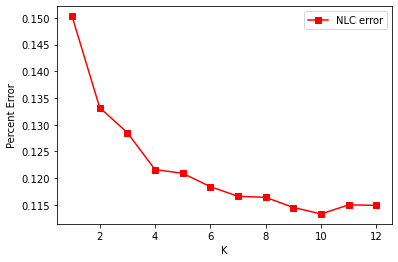

In [ ]:
NLC_acc=[0.8497,0.8668,0.8715,0.8784,0.8791,0.8816,
         0.8834,0.8836,0.8855,0.8867,0.885,0.8851]

np.argmax(NLC_acc) #10 is the best

NLC_error = 1-np.array(NLC_acc)


plt.plot(range(1,13), NLC_error,'-rs', label = 'NLC error')
plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#confusion matrix

In [ ]:
#let k=1
#find dist from k to all train points
#find clostsest 1 from each group
#find centroid
#find dist from k to each centroid
#find smallest distance
#arg min to find prediction

#k=2 
#find next closest
#find centroid
#find dist from test point to each centroid

#
k1_preds=[]
k2_preds=[]
k3_preds=[]
k4_preds=[]
k5_preds=[]
k6_preds=[]
k7_preds=[]
k8_preds=[]
k9_preds=[]
k10_preds=[]
k11_preds=[]
k12_preds=[]

for r in range(X_test.shape[0]): 

    G0_dists, G1_dists, G2_dists, G3_dists, G4_dists = [],[],[],[],[] 
    G5_dists, G6_dists, G7_dists, G8_dists, G9_dists = [],[],[],[],[]
    closest_img_index_G0, closest_img_index_G1, closest_img_index_G2 = [],[],[]
    closest_img_index_G3, closest_img_index_G4, closest_img_index_G5= [],[],[]
    closest_img_index_G6, closest_img_index_G7, closest_img_index_G8  = [],[],[]
    closest_img_index_G9 = []

    test_point = X_test[r,:]

    #finds all distances, only run once
    for i in range(G0.shape[0]):
        G0_dists.append( np.sqrt(np.sum((  test_point - G0[i,:]  )**2)) )
        G1_dists.append( np.sqrt(np.sum((  test_point - G1[i,:]  )**2)) )
        G2_dists.append( np.sqrt(np.sum((  test_point - G2[i,:]  )**2)) )
        G3_dists.append( np.sqrt(np.sum((  test_point - G3[i,:]  )**2)) )
        G4_dists.append( np.sqrt(np.sum((  test_point - G4[i,:]  )**2)) )
        G5_dists.append( np.sqrt(np.sum((  test_point - G5[i,:]  )**2)) )
        G6_dists.append( np.sqrt(np.sum((  test_point - G6[i,:]  )**2)) )
        G7_dists.append( np.sqrt(np.sum((  test_point - G7[i,:]  )**2)) )
        G8_dists.append( np.sqrt(np.sum((  test_point - G8[i,:]  )**2)) )
        G9_dists.append( np.sqrt(np.sum((  test_point - G9[i,:]  )**2)) )

    #k=1###########################################
    #find index of shortest dist
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)


    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=2##################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf
    #k=3##########################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf


    #k=4
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=5#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=6#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=7#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=8#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #k=9#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf


    #k=10#################################################
    #find next index
    i0=np.argmin(G0_dists)
    i1=np.argmin(G1_dists)
    i2=np.argmin(G2_dists)
    i3=np.argmin(G3_dists)
    i4=np.argmin(G4_dists)
    i5=np.argmin(G5_dists)
    i6=np.argmin(G6_dists)
    i7=np.argmin(G7_dists)
    i8=np.argmin(G8_dists)
    i9=np.argmin(G9_dists)

    closest_img_index_G0.append(i0)
    closest_img_index_G1.append(i1)
    closest_img_index_G2.append(i2)
    closest_img_index_G3.append(i3)
    closest_img_index_G4.append(i4)
    closest_img_index_G5.append(i5)
    closest_img_index_G6.append(i6)
    closest_img_index_G7.append(i7)
    closest_img_index_G8.append(i8)
    closest_img_index_G9.append(i9)
    #set that dist to inf so it's not found on next loop
    G0_dists[i0] = np.Inf
    G1_dists[i1] = np.Inf
    G2_dists[i2] = np.Inf
    G3_dists[i3] = np.Inf
    G4_dists[i4] = np.Inf
    G5_dists[i5] = np.Inf
    G6_dists[i6] = np.Inf
    G7_dists[i7] = np.Inf
    G8_dists[i8] = np.Inf
    G9_dists[i9] = np.Inf

    #find centroids
    c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
    c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
    c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
    c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
    c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
    c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
    c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
    c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
    c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
    c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

    #find dist from test point to each centroid
    test_to_centroids_dists = []
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
    test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

    #actually finds the prediction
    k10_preds.append(np.argmin(test_to_centroids_dists))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, k10_preds, labels=[0,1,2,3,4,5,6,7,8,9]))

[[830   1  12  23   4   2 120   0   8   0]
 [  1 977   0  16   2   0   3   0   1   0]
 [ 21   1 821   9  85   0  63   0   0   0]
 [ 25   4  15 896  35   0  23   0   2   0]
 [  1   0 108  30 811   0  47   0   3   0]
 [  0   0   0   0   0 959   0  20   0  21]
 [124   1  97  24  84   0 663   0   7   0]
 [  0   0   0   0   0  16   0 960   0  24]
 [  2   0   1   4   3   2   6   5 977   0]
 [  0   0   0   0   0   6   0  20   1 973]]


In [ ]:
""" for k=10
[[830   1  12  23   4   2 120   0   8   0]
 [  1 977   0  16   2   0   3   0   1   0]
 [ 21   1 821   9  85   0  63   0   0   0]
 [ 25   4  15 896  35   0  23   0   2   0]
 [  1   0 108  30 811   0  47   0   3   0]
 [  0   0   0   0   0 959   0  20   0  21]
 [124   1  97  24  84   0 663   0   7   0]
 [  0   0   0   0   0  16   0 960   0  24]
 [  2   0   1   4   3   2   6   5 977   0]
 [  0   0   0   0   0   6   0  20   1 973]]
 """